<a href="https://colab.research.google.com/github/iliruslanili/prob_theory/blob/hw2/probability_theory_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функции формул

In [ ]:
# Импортируем все нужное
import math
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

Реализация функции сочетаний $C_{n}^{k}=\frac{n!}{k!(n-k)}$

In [ ]:
def comb(n: int, k: int):
  """
  Parameters
  ----------
  n: int 
      Общее количество объектов
  k: int 
      Количество объектов в выборке
  return: int
      Количество сочетаний из n объектов по k единиц
  """
  return factorial(n)/(factorial(k)*factorial(n-k))

Реализация функции Бернулли $P_{n}^{k}=C_{n}^{k}p^{k}q^{n-k}$

In [ ]:
def bernoulli(n: int, k: int, p:float):
  """
  Parameters
  ----------
  n: int 
      Общее количество объектов
  k: int 
      Количество необходимых событий
  return: int
      Вероятность появления события определённое количество
  """
  return comb(n, k) * p**k * (1 - p)**(n-k)

Реализация формулы Пуассона: $P_{m}=\frac{\lambda^{m}}{m!}e^{-\lambda}$

In [ ]:
def poisson(n: int, m: int, p: int):
  _lambda = n * p
  return (_lambda**m / factorial(m)) * math.e**-_lambda

#1. Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.

Рассчитаем по формуле Бернулли.
n = 100
k = 85
p = 0.8

In [ ]:
p = bernoulli(n=100, k=85, p=0.8)
print(f'Вероятность: {p}')

Вероятность: 0.048061793700746355


#2. Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек.

Количество испытаний большое (5000), а вероятности малые (0.0004), поэтому пользуемся формулой Пуассона: $P_{m}=\frac{\lambda^{m}}{m!}e^{-\lambda}$

##А. Какова вероятность, что ни одна из них не перегорит в первый день?

In [ ]:
n = 5000
m = 0
p = 0.0004
prob = poisson(n=n, m=m, p=p)
print(f'Вероятность: {prob}')

Вероятность: 0.1353352832366127


##Б. Какова вероятность, что перегорят ровно две?

In [ ]:
n = 5000
m = 2
p = 0.0004
prob = poisson(n=n, m=m, p=p)
print(f'Вероятность: {prob}')

Вероятность: 0.2706705664732254


Эксперимент с другими значениями

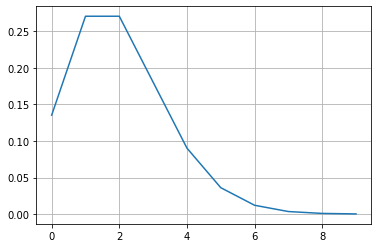

In [57]:
n = 5000
p = 0.0004
x = [i for i in range(0, 10)]
y = [poisson(n, m, p) for m in x]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.show()

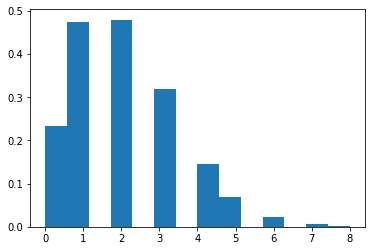

In [43]:
s = np.random.poisson(2, 5000)
count, bins, ignored = plt.hist(s, 14, density=True)

#3. Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?

Количество испытаний малое(144), вероятность выпадения достаточно высокая(0.5) поэтому работаем с формулой Бернулли: $P_{n}^{k}=C_{n}^{k}p^{k}q^{n-k}$

In [44]:
n = 144
k = 70
p = 0.5
prob = bernoulli(n=n, k=k, p=p)
print(f'Вероятность: {prob}')

Вероятность: 0.06281178035144776


#4. В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча.

##А. Какова вероятность того, что все мячи белые?

In [47]:
# Вероятность вытянуть белые из 1 ящика
p1 = comb(7, 2)/comb(10, 2)
# Вероятность вытянуть белые из 2 ящика
p2 = comb(9, 2)/comb(11, 2)
# Вероятность вытянуть белые из обоих ящиков
p = p1 * p2
print(f'Вероятность: {p}')

Вероятность: 0.3054545454545455


##Б. Какова вероятность того, что ровно два мяча белые?

In [51]:
# 1 ящик - 2 белых, 2 ящик - 2 черных
p1 = comb(7, 2)/comb(10, 2) * comb(2, 2)/comb(11, 2)
print(p1)

0.008484848484848486


In [53]:
# 1 ящик - 2 черных, 2 ящик - 2 белых
p2 = comb(3, 2)/comb(10, 2) * comb(9, 2)/comb(11, 2)
print(p2)

0.04363636363636363


In [54]:
# 1 ящик - 1 белый + 1 черный, 2 ящик - 1 белый + 1 черный
p3 = comb(3, 1)*comb(7, 1)/comb(10, 2) * comb(9, 1)*comb(2, 1)/comb(11, 2)
print(p3)

0.15272727272727274


In [55]:
print(f'Общая вероятность: {p1+p2+p3}')

Общая вероятность: 0.20484848484848486


##В. Какова вероятность того, что хотя бы один мяч белый?

In [48]:
# Пойдем от обратного и посчитаем вероятность вытянуть не белые
# Первый ящик
p1 = comb(3, 2) / comb(10, 2)
# Второй
p2 = comb(2, 2) / comb(11, 2)
# Перемножаем и инвертируем
p = 1 - (p1 * p2)
print(f'Вероятность: {p}')

Вероятность: 0.9987878787878788
